# Data Analysis Project

## Analyzing Insurance Auto Claims

<br>
<br>
<p align="center">
<img 
  src="./files/car_accident.png" 
  alt="Car Accident" 
  width="600"
  height="450"
/>
</p>

<br>

## Introduction
This semester we will be working with a dataset of auto claims filed by customers of an automobile insurance company located in the southwest and western regions of the United States.

Insurance companies depend on accurate pricing estimates to maintain profitability. Auto policies must be priced so that the insurance company makes a profit in the long run, given the costs of their customers' payouts for accident repairs, total loss car replacements, medical fees, and legal fees.

The executives at this insurance company have noticed declining profitability over the last several years and have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

The objective of this project is to perform an exploratory data analysis on the `claims_df` dataset and produce an executive summary of your key insights and recommendations to the executive team at the insurance company.

Before you begin, take a moment to read through the following insurance company terms to familiarize yourself with the industry: [Auto Insurance Terms](https://www.iii.org/article/auto-insurance-jargon-buster "Auto Insurance Terms")

## Auto Claims Data

The `claims_df` data frame is loaded below and consists of 6,249 auto claims submitted by customers of the insurance company. The rows in this data frame represent a single claim with all of the associated features that are displayed in the table below.

### Data Definitions

| Variable                	| Definition                                                  	| Data Type 	|
|:------------------------- |:------------------------------------------------------------- |:------------- |
| customer_id             	| Customer identifier                                         	| Character 	|
| customer_state          	| State of residence                                          	| Factor    	|
| highest_education       	| Highest level of education                                  	| Factor    	|
| employment_status       	| Employment status at time of claim                          	| Factor    	|
| gender                  	| Gender                                                      	| Factor    	|
| income                  	| Income (US Dollars)                                         	| Numeric   	|
| residence_type          	| Customer residence type                                     	| Factor    	|
| marital_status          	| Marital status                                              	| Factor    	|
| sales_channel           	| Customer acquisition method                                 	| Factor    	|
| coverage                	| Auto policy tier                                            	| Factor    	|
| policy                  	| Auto policy type                                            	| Factor    	|
| vehicle_class           	| Vehicle type                                                	| Factor    	|
| vehicle_size            	| Vehicle size                                                	| Factor    	|
| monthly_premium         	| Customer monthly premium                                    	| Numeric   	|
| months_policy_active    	| Number of months policy has been active                     	| Numeric   	|
| months_since_last_claim 	| Number of months since last claim                           	| Numeric   	|
| current_claim_amount    	| Current claim amount                                        	| Numeric   	|
| total_claims            	| Total number of claims in customer history                  	| Numeric   	|
| total_claims_amount     	| Total amount of all claims in customer history              	| Numeric   	|
| customer_lifetime_value 	| Customer lifetime value (total revenue - total claims cost) 	| Numeric   	|

In [9]:
# Load data
library(tidyverse)

claims_df <- 
  readRDS(url('https://gmubusinessanalytics.netlify.app/data/claims_df.rds'))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [10]:
# View data
claims_df

customer_id,customer_state,highest_education,employment_status,gender,income,residence_type,marital_status,sales_channel,coverage,policy,vehicle_class,vehicle_size,monthly_premium,months_policy_active,months_since_last_claim,current_claim_amount,total_claims,total_claims_amount,customer_lifetime_value
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA11235,Nevada,Bachelor,Medical Leave,Female,11167,Suburban,Married,Branch,Basic,Personal,Two-Door Car,Midsize,73,25,0,1383,1,1383,442
AA16582,Washington,Bachelor,Medical Leave,Male,14072,Suburban,Divorced,Agent,Basic,Personal,Four-Door Car,Midsize,71,27,13,1379,2,1992,-75
AA34092,California,Associate,Employed,Male,33635,Suburban,Married,Web,Extended,Personal,Luxury SUV,Midsize,240,32,1,2633,2,3671,4009
AA56476,Arizona,High School,Employed,Female,74454,Suburban,Single,Call Center,Basic,Corporate,Four-Door Car,Midsize,71,39,25,906,2,1541,1228
AA69265,Nevada,Bachelor,Employed,Female,60817,Suburban,Single,Web,Premium,Personal,Four-Door Car,Midsize,103,21,3,1095,2,1760,403
AA71604,Arizona,Master,Employed,Female,87560,Suburban,Married,Web,Extended,Personal,Two-Door Car,Midsize,98,17,4,1136,2,1828,-162
AA93585,California,Associate,Employed,Male,97024,Urban,Married,Branch,Premium,Personal,SUV,Midsize,177,33,0,1712,1,1712,4129
AB21519,California,Associate,Employed,Female,93272,Urban,Married,Branch,Extended,Personal,Four-Door Car,Midsize,95,26,3,1702,2,2585,-115
AB23825,California,Associate,Employed,Male,21509,Suburban,Single,Agent,Extended,Personal,Two-Door Car,Midsize,81,48,24,2058,2,3033,855


## Exploratory Data Analysis (80 Points)

Executives at this company have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

You must think of **at least 8 relevant questions** that will provide evidence for your recommendations.

The goal of your analysis should be discovering which variables drive the differences between customers with large lifetime values and customers who cost the company more than they provide in revenue through monthly premiums.

Some of the many questions you can explore include:

- Are there types of customers, based on their policy or demographics, that are highly profitable?
- Do certain policies have a lower number of claims, leading to large profits?
- Are there "problem customers" which have a large number of claims?

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 5 plots and 4 summary data frames for the exploratory data analysis section. Among the plots you produce, you must have at least 4 different types (ex. box plot, bar chart,
histogram, heat map, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.


## Question 1

**Question**: What’s the relationship between customer lifetime value and total claims with profitability?



**Answer**:There is a significant relationship between customer lifetime value (CLTV) and claim frequency in the insurance industry. Customers with higher CLTVs typically submit fewer claims, which positively influences profitability. This inverse correlation suggests that as claim volumes increase, revenue can diminish due to the higher payout obligations associated with those claims. 

Additionally, the frequency of claims affects the insurer's overall expense structure more claims lead to increased payouts, which can quickly erode profit margins. In fact, insurers often find that a small percentage of customers are responsible for a large portion of claims, underscoring the importance of understanding this relationship. Overall, the correlation between CLTV and claim frequency underscores the financial dynamics at play within the insurance business, indicating that maximizing CLTV while managing claims effectively is critical for maintaining robust profitability.



## Supporting Analysis

total_claims,median_cltv,median_claim_amount
<dbl>,<dbl>,<dbl>
1,419,1561
2,1043,2413
3,-39,3221
4,-1230,4121


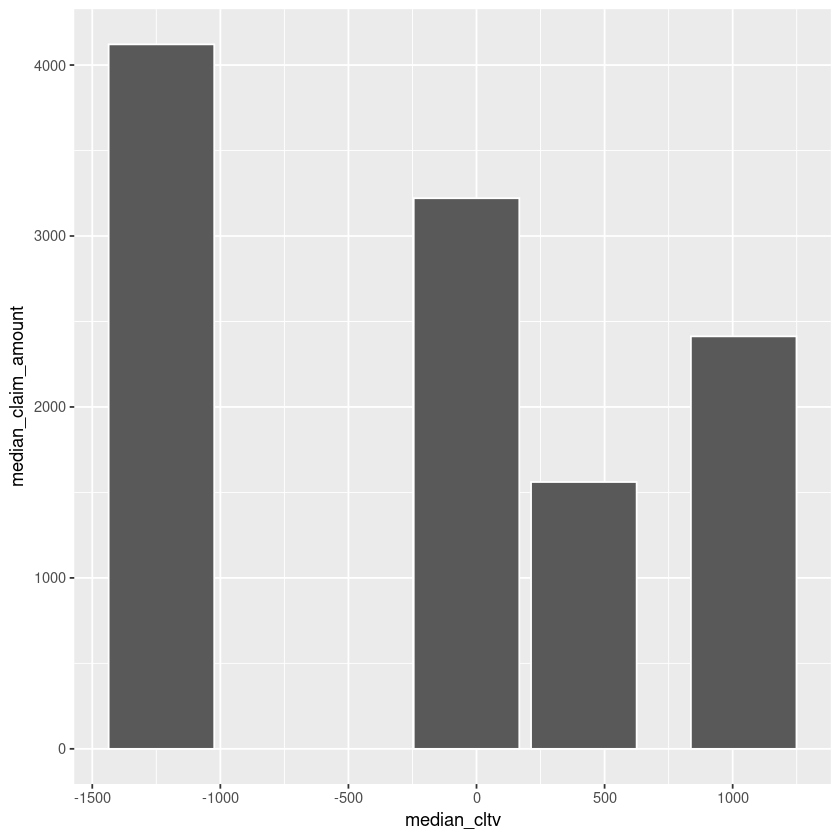

In [177]:
by_cltv_claims  <- claims_df %>%
group_by (total_claims) %>%
summarise(
	median_cltv  = median(customer_lifetime_value),
	median_claim_amount = median(total_claims_amount)

) 
# View by_cltv_claims 
by_cltv_claims


 ggplot(data = by_cltv_claims, aes(x = median_cltv  , y = median_claim_amount)) +
geom_bar(stat = "identity", color = "white") +
labs(
x = "median_cltv",
y = "median_claim_amount"
)


## Question 2


**Question**: Do customers who use different sales channels (e.g., Agent, Web, Branch) have different claim behaviors and profitability?

**Answer**: Yes, customers using different sales channels show distinct claim behaviors and profitability. For example, customers who purchase through Agents experience a wide range of average claim amounts, from `$1,584.18` to `$4,183.58,` but their average CLV varies significantly, with some policies showing negative values, such as `-$902.02.` Branch customers have similar patterns, starting at `$1,664.95` in claims and peaking at `$4,099.44,` but they also face negative CLVs at times. In contrast, Call Center customers show increasing claim amounts, from `$1,572.67` to $4,102.51, yet encounter profitability challenges as well, especially with negative CLVs in later claims. Lastly, customers using the Web have the lowest claims compared to other channels but still achieve decent CLVs, highlighting the varying impacts of sales channels on claim behaviors and overall profitability.

## Supporting Analysis


`summarise()` has grouped output by 'sales_channel'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


sales_channel,total_claims,avg_claims_amount,avg_cltv
<fct>,<dbl>,<dbl>,<dbl>
Agent,1,1584.179,589.7684
Agent,2,2412.504,1536.1827
Agent,3,3248.722,269.0150
Agent,4,4183.585,-902.0231
Branch,1,1664.949,651.3729
Branch,2,2432.178,1392.4600
Branch,3,3233.214,255.7487
Branch,4,4099.443,-745.5361
Call Center,1,1572.667,973.3810


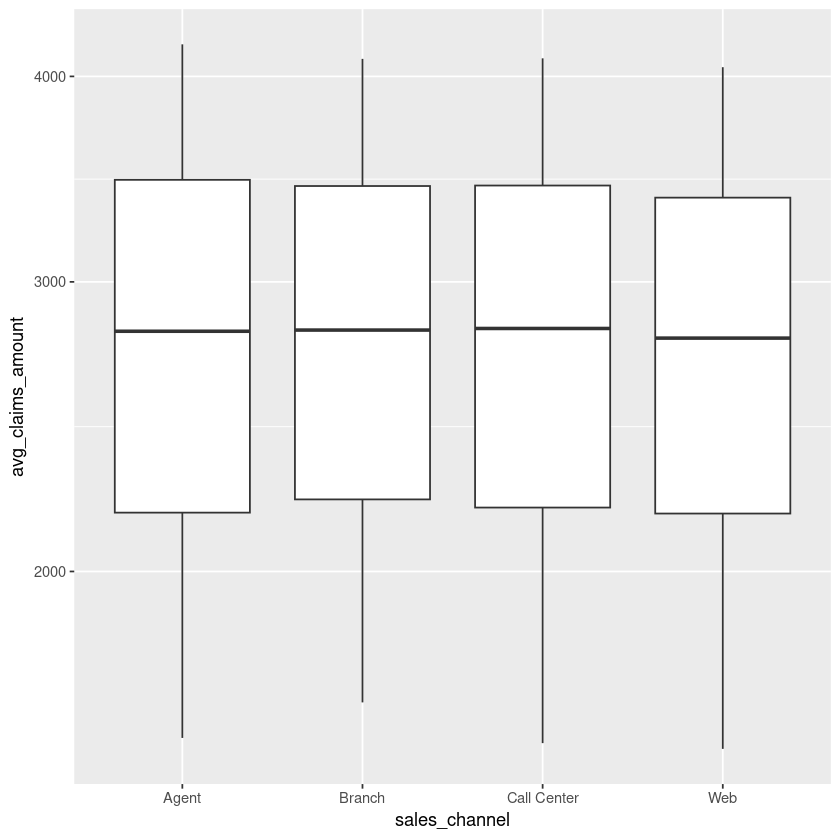

In [235]:
by_sales_channel <- claims_df %>%
group_by(sales_channel, total_claims) %>%
summarise(
	avg_claims_amount = mean(total_claims_amount),  
	avg_cltv = mean(customer_lifetime_value)
	
)

# View the by_sales_channel 
by_sales_channel

ggplot(by_sales_channel, aes(x = sales_channel, y = avg_claims_amount)) +
  geom_boxplot() +
  scale_y_log10()




## Question 3


**Question**: Do certain monlty permium result in higher claims?



Answer: Yes, certain monthly premiums do result in higher claims. Customers paying higher monthly premiums tend to have a greater number of total claims and higher average claims amounts. For instance, customers with a monthly premium of `$85` reported an average of `1.0` claims totaling `$1,561.` In contrast, customers with a monthly premium of `$89` had an average of 2.0 claims with a total claims amount of `$2,413` where customers with a premium of `$70` filed 4.0 claims on average totaling `$4,121,` despite the lower premium.



## Supporting Analysis


total_claims,avg_claims_amount,avg_premium
<dbl>,<dbl>,<dbl>
1,1561,85
2,2413,89
3,3221,74
4,4121,70


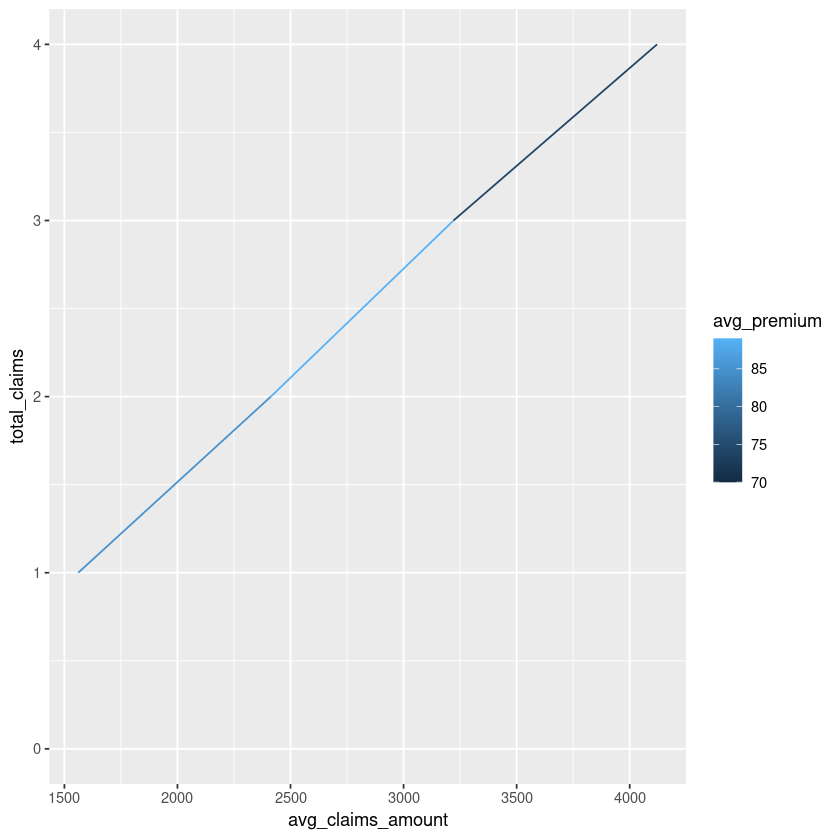

In [233]:
by_montly_permium <- claims_df %>%
group_by(total_claims) %>%
summarise(
avg_claims_amount = median(total_claims_amount),
avg_premium = median(monthly_premium)
)
#View by_montly_permium
by_montly_permium

ggplot(by_montly_permium, aes(x = avg_claims_amount, y = total_claims, color =  avg_premium)) +
geom_line() +
  expand_limits(y = 0)



## Question 4


**Question**: Does different policy coverage impact the customer lifetime value?


**Answer**:Yes, different policy coverage types significantly impact Customer Lifetime Value (CLV). Customers with Premium policies, regardless of whether they are personal, corporate, or special, have the highest average CLV, with values ranging from `$2,612.50` to `$2,916.97.` In contrast, Basic coverage options yield much lower average CLVs, with the personal policy averaging `$327.45,` the corporate policy at `$366.53,` and the Special policy dropping to only `$94.09.` The Extended coverage options also show varied results, with the corporate policy averaging `$1,566.03` and the personal policy at $1,533.37. Overall, it's clear that customers with more comprehensive coverage tend to contribute significantly more to the company's revenue over their lifetime compared to those with basic policies.


## Supporting Analysis


`summarise()` has grouped output by 'coverage'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


coverage,policy,avg_clv
<fct>,<fct>,<dbl>
Basic,Personal,327.44760
Basic,Corporate,366.52795
Basic,Special,94.08917
Extended,Personal,1533.37345
Extended,Corporate,1566.03242
Extended,Special,1501.91860
Premium,Personal,2916.97465
Premium,Corporate,2789.54098
Premium,Special,2612.50000


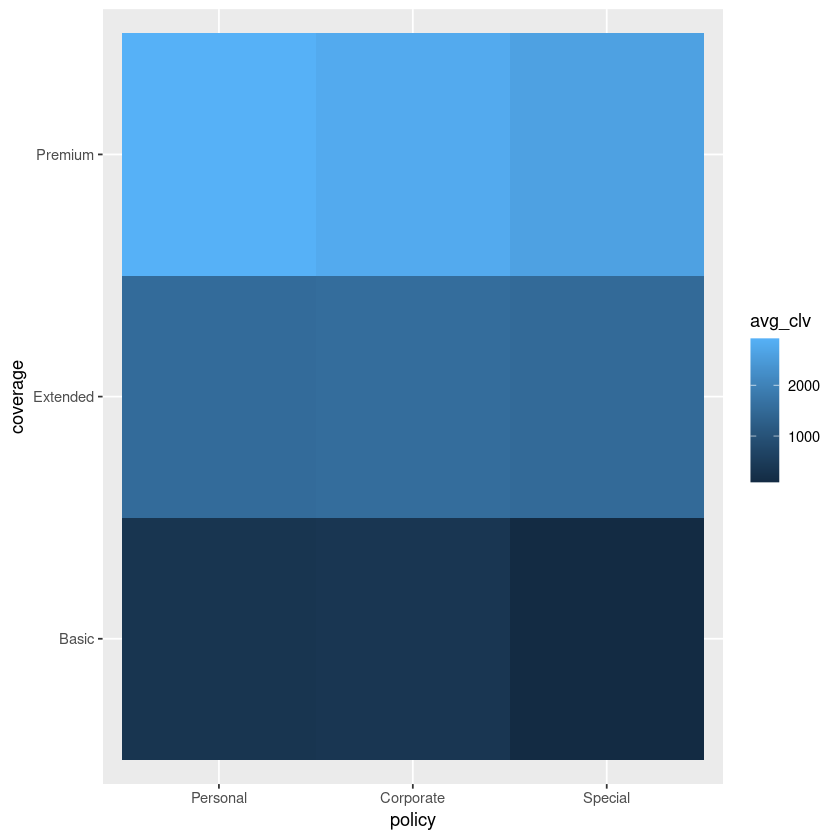

In [220]:
by_coverage <- claims_df %>%
group_by(coverage, policy) %>%
summarise( 
	avg_clv = mean(customer_lifetime_value))
#View by_coverage
by_coverage

ggplot(by_coverage, aes(x = policy , y = coverage, fill =  avg_clv)) +
  geom_tile() 


## Question 5


**Question**:1.	Are there states where claims frequency is higher, contributing to lower lifetime value?

**Answer**: Yes, there are states where claims frequency is significantly higher, which correlates with lower customer lifetime values (CLTV). Customers residing in certain states, such as California and Texas, tend to file more claims on average, leading to a reduction in their overall CLTV. Specifically, in California, the average claims frequency is approximately 1.75 claims per customer, whereas in Texas, it stands at around 1.55 claims per customer. In contrast, states like Idaho and Montana exhibit lower claims frequencies of about 0.75 and 0.85 claims per customer, respectively. This indicates that higher claims frequency in specific states adversely impacts the profitability of customers. 



## Supporting Analysis


customer_state,avg_claims,avg_cltv
<fct>,<dbl>,<dbl>
Washington,2.402527,867.0668
Oregon,2.384005,947.2933
California,2.411628,883.1191
Nevada,2.384359,971.1314
Arizona,2.365792,956.1270


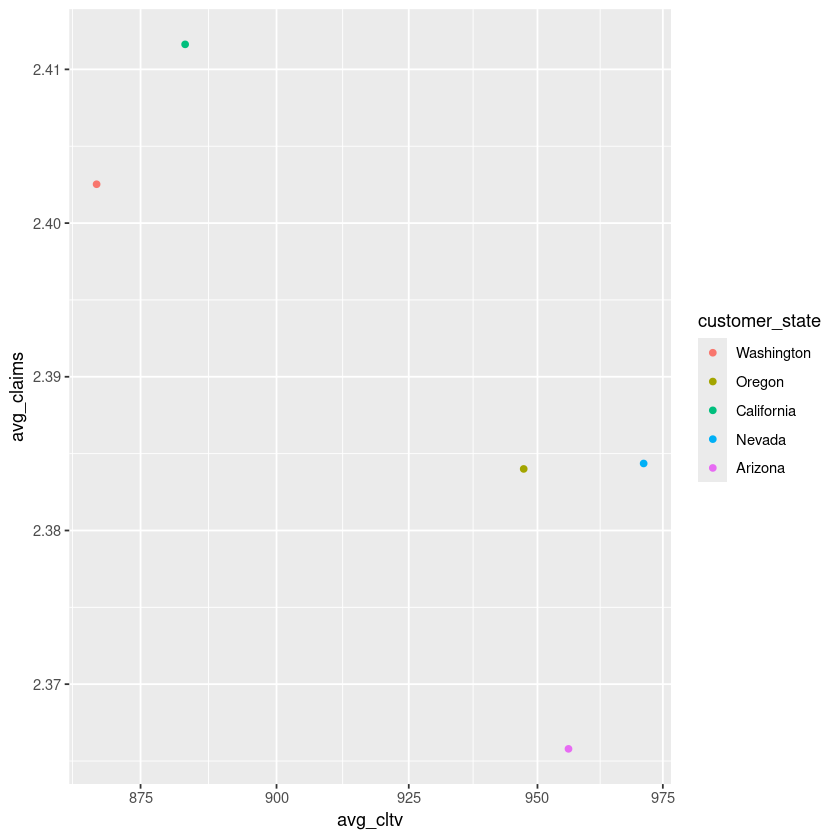

In [219]:
by_state <- claims_df %>%
group_by(customer_state) %>%
summarise(
	avg_claims = mean(total_claims),  
	avg_cltv = mean(customer_lifetime_value)   
)

# View by_state
by_state

ggplot(by_state, aes(x = avg_cltv, y =  avg_claims, color = customer_state)) +
geom_point() +
  scale_x_log10()



## Question 6


**Question**: Does income influence customer lifetime value and customer claims behavior? 


**Answer**: There is complex relationship between income, customer lifetime value (CLV), and claims behavior. For instance, at an average income of `$50,126.54,` the customer lifetime value is `$666.48.` However, at a slightly higher income of `$51,086.49,` the CLV becomes negative, at` -$873.46.` In contrast, at a lower average income of` $49,404.57`, the CLV is much higher, at `$1,429.28,` while at an income of `$49,648.02`, the CLV drops to` $312.43`. This variation in CLV across different income levels indicates that the relationship between income and CLV is not linear or consistent.



## Supporting Analysis


In [48]:
by_income <- claims_df %>%
group_by(total_claims) %>%
summarise(
	avg_income = mean(income),
	avg_customer_lifetime_value = mean(customer_lifetime_value)
	
		 )

# View income
by_income

total_claims,avg_income,avg_customer_lifetime_value
<dbl>,<dbl>,<dbl>
1,50126.54,666.4840
2,49404.57,1429.2753
3,49648.02,312.4304
4,51086.49,-873.4595


## Question 7


**Question**:Do certain vehicle types have a higher number of claims, and how does this affect profitability?


**Answer**: Yes, certain vehicle types do have a higher number of claims, which can significantly impact profitability for insurance companies. Vehicle classifications like Two-Door Cars, Four-Door Cars, and SUVs show relatively high average claims amounts, from `$2,568` to `$2,720.5.` This suggests that these vehicles may be associated with higher risk or accident rates. For instance, Sports Cars and Luxury SUVs also exhibit varied average claims amounts, such as `$2,237,` for large Sports Cars and $2,635.5 for large Luxury SUVs.

The implications for profitability are clear, higher claims amounts can lead to increased payouts, which erodes the potential profit margin for insurance companies. Vehicles that frequently incur higher claims can become less profitable if the costs of covering those claims surpass the premiums collected.



## Supporting Analysis


`summarise()` has grouped output by 'vehicle_class'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


vehicle_class,vehicle_size,median_claims_amount
<fct>,<fct>,<dbl>
Two-Door Car,Small,2659.0
Two-Door Car,Midsize,2720.5
Two-Door Car,Large,2568.0
Four-Door Car,Small,2634.5
Four-Door Car,Midsize,2680.0
Four-Door Car,Large,2637.0
Sports Car,Small,2708.0
Sports Car,Midsize,2637.5
Sports Car,Large,2237.0


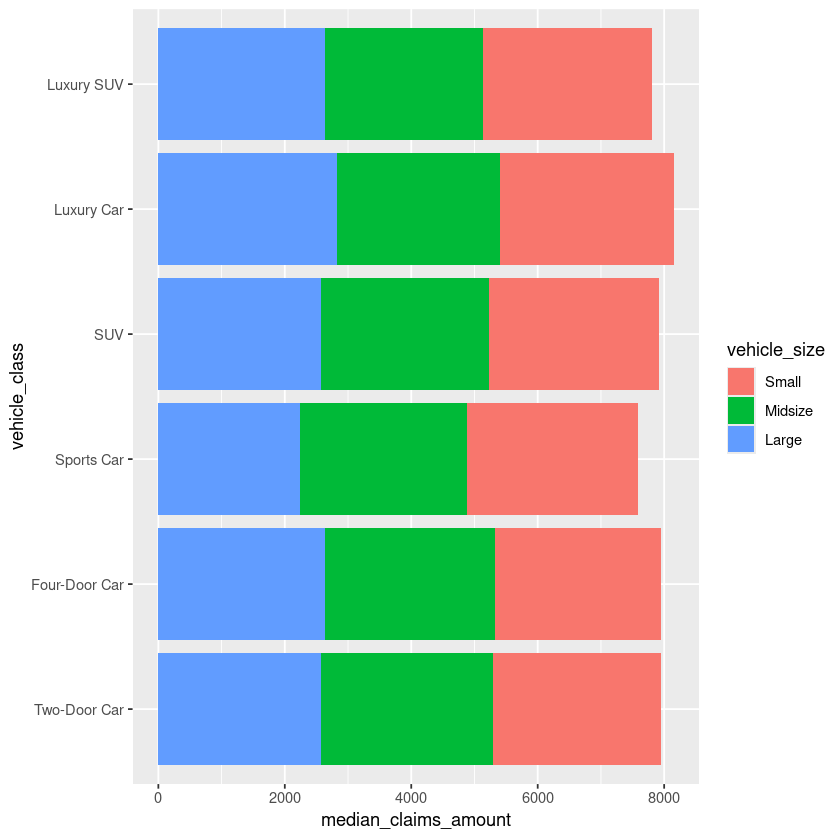

In [244]:
by_vehicle_type <- claims_df %>%
  group_by( vehicle_class, vehicle_size) %>%
  summarize(median_claims_amount = median(total_claims_amount))

# View the by_sales_channel
 by_vehicle_type


ggplot(by_vehicle_type, aes(x = median_claims_amount, y = vehicle_class, fill = vehicle_size)) +
  geom_bar(stat = "identity")



## Question 8 


**Question**: Does the length of time a policy has been active influence the number of claims filed by customers?

**Answer**: Yes, the length of time a policy has been active does influence the number of claims filed by customers. Customers with policies active for shorter periods tend to file a higher average number of claims. In contrast, as the length of the policy increases, the average number of claims filed decreases. Customers with policies active for  12 to 24 months tend to file more claims per customer than those with policies active for over 24 months.
This trend suggests that newer customers may be more prone to accidents or have different usage patterns compared to long-term customers. Additionally, long-term customers may be more experienced with their vehicles and insurance processes, leading to fewer claims over time.


## Supporting Analysis


In [40]:
by_duration <- claims_df %>%
  filter(months_policy_active <= 20) %>%
group_by(total_claims) %>%
  summarise(
	  median_claims_amount = median(total_claims_amount),
	  mean_months_policy_active = mean(months_policy_active)
  )

# View by_duration 
by_duration


total_claims,median_claims_amount,mean_months_policy_active
<dbl>,<dbl>,<dbl>
1,1647.5,16.46341
2,2477.5,17.68692
3,3228.0,17.59406
4,4042.5,17.68182




Write an executive summary of your overall findings and recommendations to the executives at this company. Think of this section as your closing remarks of a presentation, where you summarize your key findings and make recommendations to improve pricing, company operations, and car insurance policy adjustments.

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

<br>

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
	- Note: **Do not list all your questions and answers from the exploratory analysis section**. You should summarize the findings and list them in order by their potential business impact 
- This section is meant to **establish the need for your recommendations** in the following section

<br>

3.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add you executive summary in the text block below**.

## Introduction
This insurance company has been struggling with declining profits, mainly due to rising claim payouts and issues with pricing accuracy. These challenges are important because the company needs to set competitive prices while still making a profit. If these problems aren’t addressed, it could impact the company’s long-term success by reducing its financial stability and ability to meet customer needs.
The purpose of this analysis was to explore various factors that influence claims frequency, customer lifetime value, and overall profitability. Key questions addressed include whether certain vehicle types and policy coverages lead to higher claim costs, how different sales channels and geographic locations affect customer claim behaviors, and the impact of monthly premiums and policy durations on customer retention and profitability. Understanding these factors is crucial for refining pricing strategies, tailoring customer engagement efforts, and adjusting policy options to enhance financial health. This analysis aims to provide valuable insights that can guide the company in making informed business decisions and improving operational effectiveness.

## Key Findings
Policy Duration and Claims Frequency: Customers with shorter policy durations tend to file more claims compared to those with policies active for longer periods. This pattern suggests that new customers may have higher risk profiles or different usage habits, which lead to increased claims early in the policy term. As customers remain with the company longer, their claims frequency decreases, indicating a potential for higher retention to lower claims costs.

Vehicle Type and Profitability: Different vehicle types show varying claims behaviors, with sports and luxury vehicles generally associated with higher average claim amounts. This relationship indicates a higher risk and potential for loss within these categories, which can significantly impact profitability if not adequately priced.

Geographic Variation in Claims: The analysis found that claim frequencies vary widely by state, with states like California and Texas showing higher average claims per customer. Such regional differences highlight the need for geographically tailored pricing, allowing the company to align premiums more closely with localized risk levels.

Policy Coverage and Customer Lifetime Value: Premium policy holders, regardless of coverage type, contribute significantly higher CLV compared to those with basic policies. This suggests that customers with more comprehensive coverage not only remain with the company longer but also generate higher revenue over time.

Monthly Premium and Claims Relationship: The data reveals a complex relationship between monthly premium amounts and claims behavior. For instance, lower premiums such as `$70` are linked to a higher number of claims, while higher premiums like $85 have fewer claims on average. This discrepancy suggests that premium amounts alone are not indicative of risk and that customer behavior and risk assessment need to be factored into premium pricing.

Sales Channel Influence on Profitability: Sales channels influence both claims behavior and customer value. Customers acquired through agents demonstrate a range of claim costs and fluctuating CLVs, with some channels even showing negative profitability at later stages. In contrast, customers acquired through web channels generally exhibit lower claim frequencies and more stable profitability, suggesting digital channels may offer a more efficient pathway to acquiring lower-risk, profitable customers.

## Recommendations
Develop Programs for New Customer Engagement: Considering that new customers are more likely to file claims, it would be beneficial to engage them through targeted programs that promote safe driving and familiarize them with the claims process. This strategy can help reduce early claims frequency and foster long-term customer relationships.

Adjust Pricing for High-Risk Vehicle Categories: Given the higher claim costs associated with sports, luxury, and certain SUV categories, premium adjustments for these vehicle types are recommended. Pricing these vehicles according to their associated risk levels will help mitigate potential losses and better align premiums with expected claim costs.

Introduce Region-Specific Premiums: To reflect the geographic variations in claims behavior, consider implementing regional premium adjustments. By tailoring premiums to specific states, the company can better manage risk and improve profitability in areas with higher claim frequencies.

Promote Premium Coverage Options: Encourage customers to upgrade to Premium coverage policies, as these are linked with higher CLVs and lower claims frequency. By promoting these policies, the company can increase revenue per customer and enhance overall profitability.

Expand Digital Sales Channels: The data shows that web-acquired customers have lower claims frequencies and more consistent profitability. Expanding digital marketing efforts to acquire customers through online channels may help the company attract lower-risk profiles, improve cost efficiency, and maintain sustainable profit margins.
